In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
def plot_evolution(df, ax, title=""):
    """
    Plots the evolution of indoor temperatures during the heating season.
    """
    df["year"] = df["month"].apply(lambda m: 2024 if m >= 10 else 2025)

    df["datetime"] = pd.to_datetime(
        dict(
            year=df["year"],
            month=df["month"].astype(int),
            day=df["day_of_month"].astype(int),
            hour=df["hour"].astype(int),
            minute=df["minutes"].astype(int),
        )
    )

    air_temp_cols = [
        col for col in df.columns if col.lower().startswith("air_temperature_")
    ]

    for col in air_temp_cols:
        ax.plot(df["datetime"], df[col], label=col)

    ax.axhline(19.5, color="red", linestyle="--", linewidth=1)
    ax.axhline(22, color="blue", linestyle="--", linewidth=1)

    ax.set_xlabel("Time")
    ax.set_ylabel("Temperature (°C)")
    ax.set_title(title)
    ax.grid(True)


def compare_plots(base_dir, filename, save_dir=None):
    """
    Graphical comparison between ad hoc and baseline performance.
    """
    dirs = os.listdir(base_dir)
    baselines = [d for d in dirs if d.endswith("_baseline_test-res1")]

    for baseline in baselines:
        prefix = baseline.replace("_baseline_test-res1", "")
        counterpart = prefix + "_test-res1"

        if counterpart in dirs:
            df_base = pd.read_csv(os.path.join(base_dir, baseline, filename))
            df_test = pd.read_csv(os.path.join(base_dir, counterpart, filename))

            fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

            plot_evolution(df_test, axes[0], title=f"{prefix} - Default")
            plot_evolution(df_base, axes[1], title=f"{prefix} - Baseline")

            handles, labels = axes[0].get_legend_handles_labels()
            fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.9), loc="upper left")

            plt.tight_layout()

            if save_dir:
                os.makedirs(save_dir, exist_ok=True)
                save_path = os.path.join(save_dir, f"{prefix}.png")
                fig.savefig(save_path, bbox_inches="tight")

            plt.show()


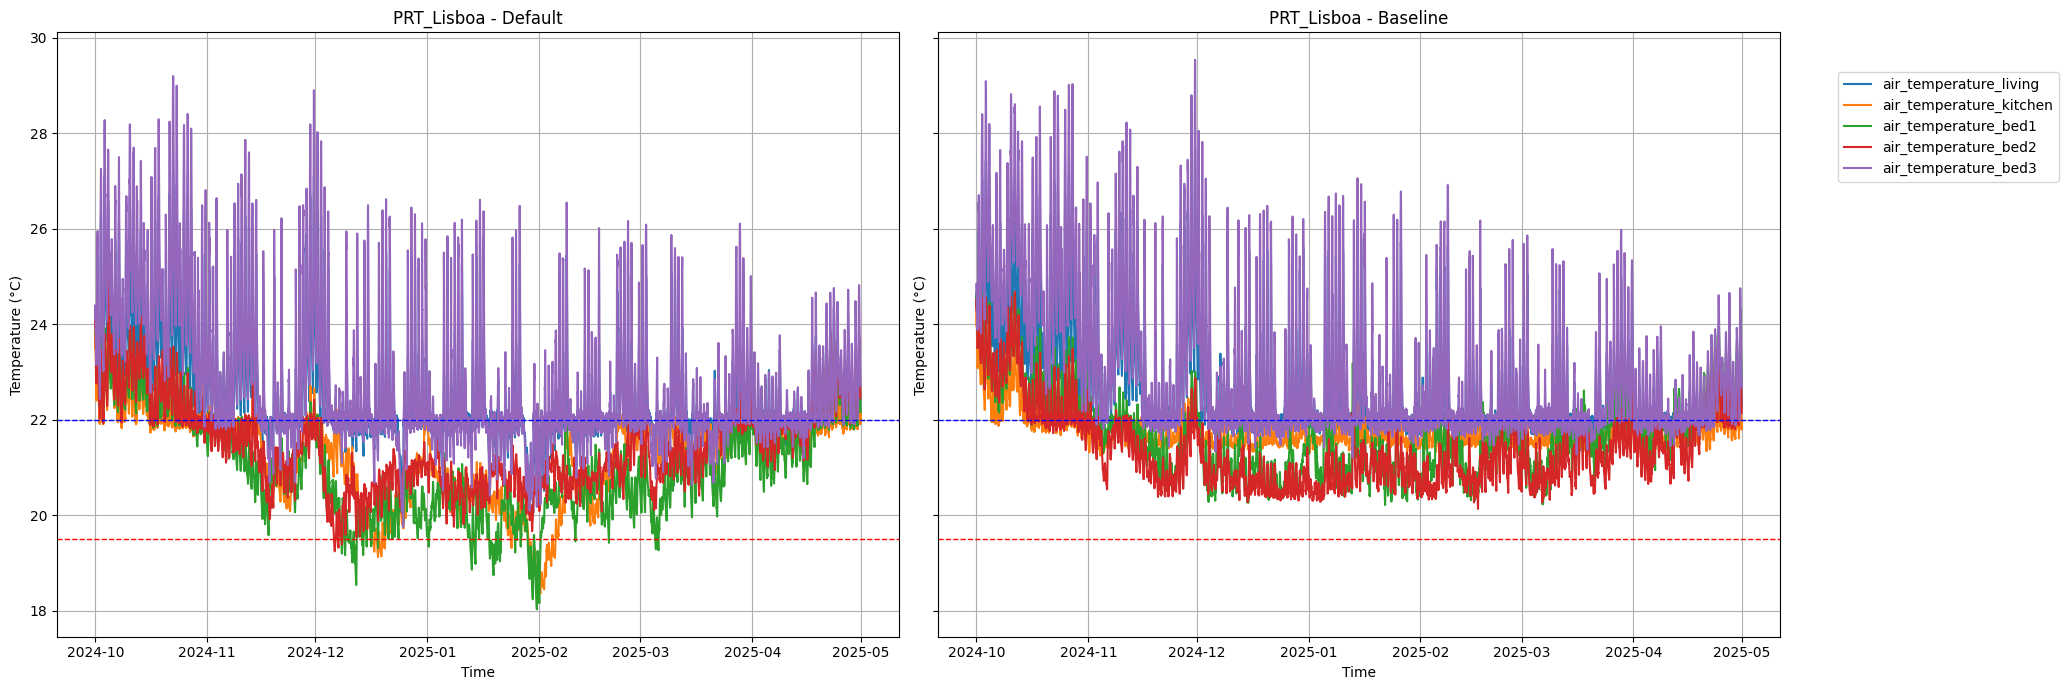

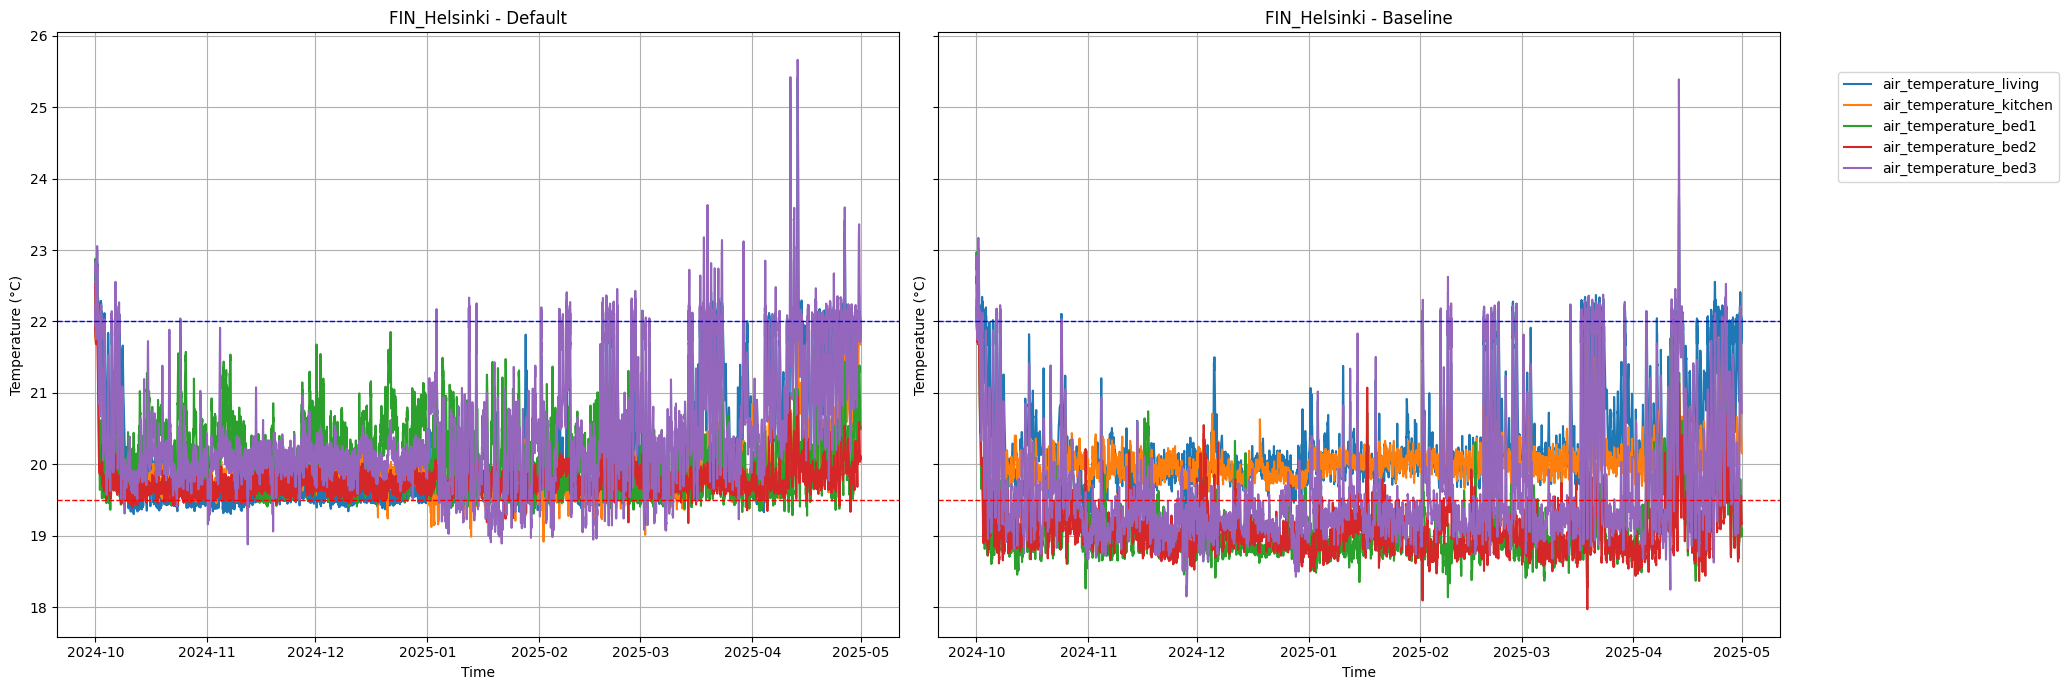

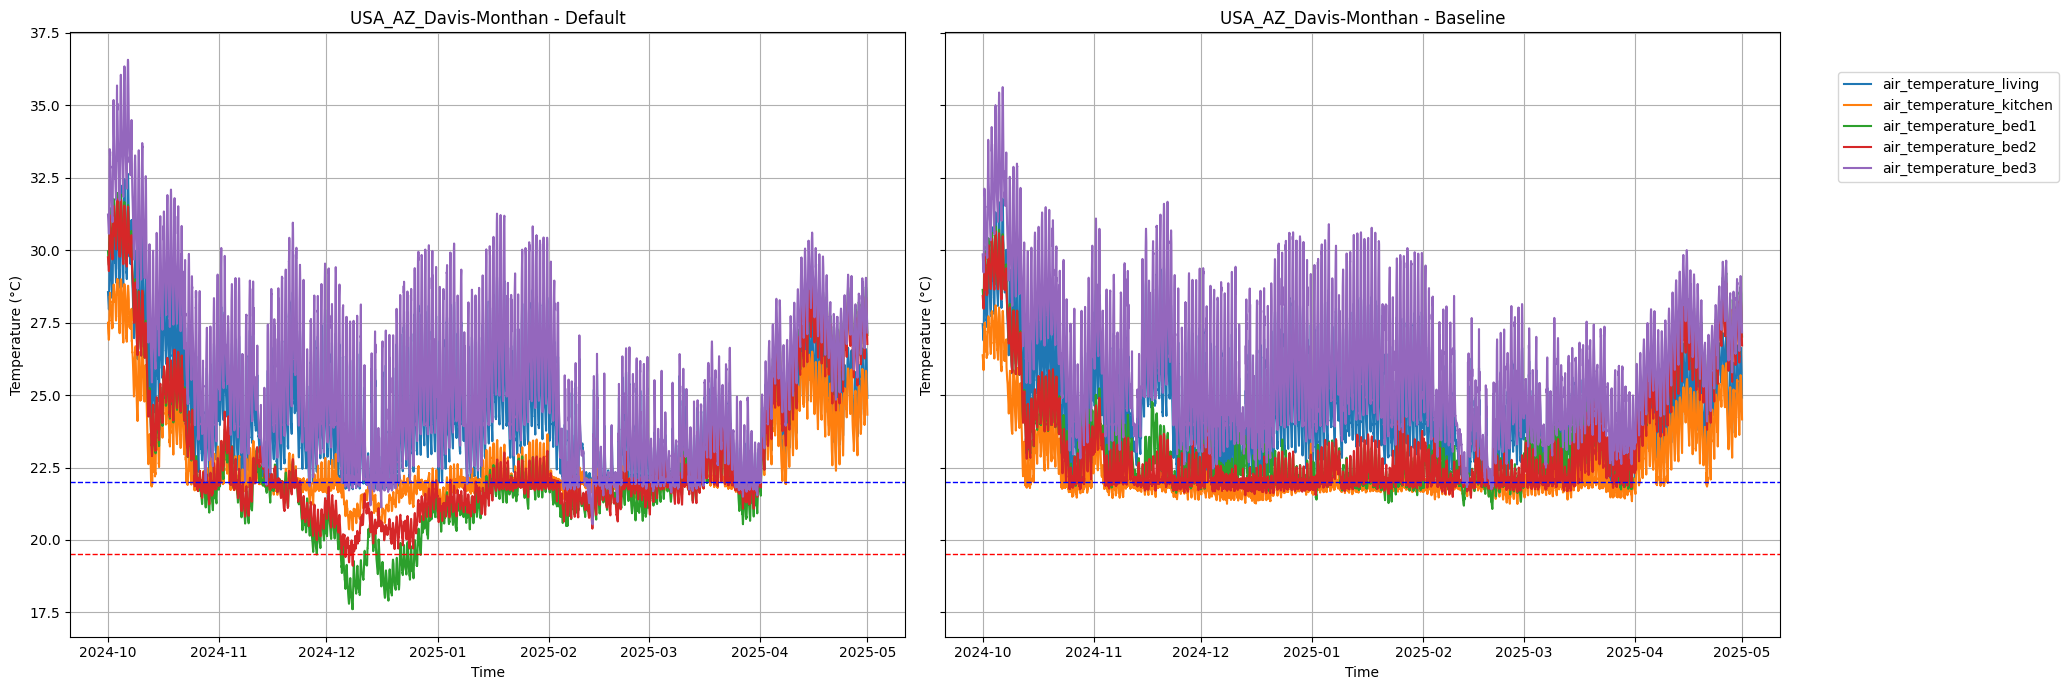

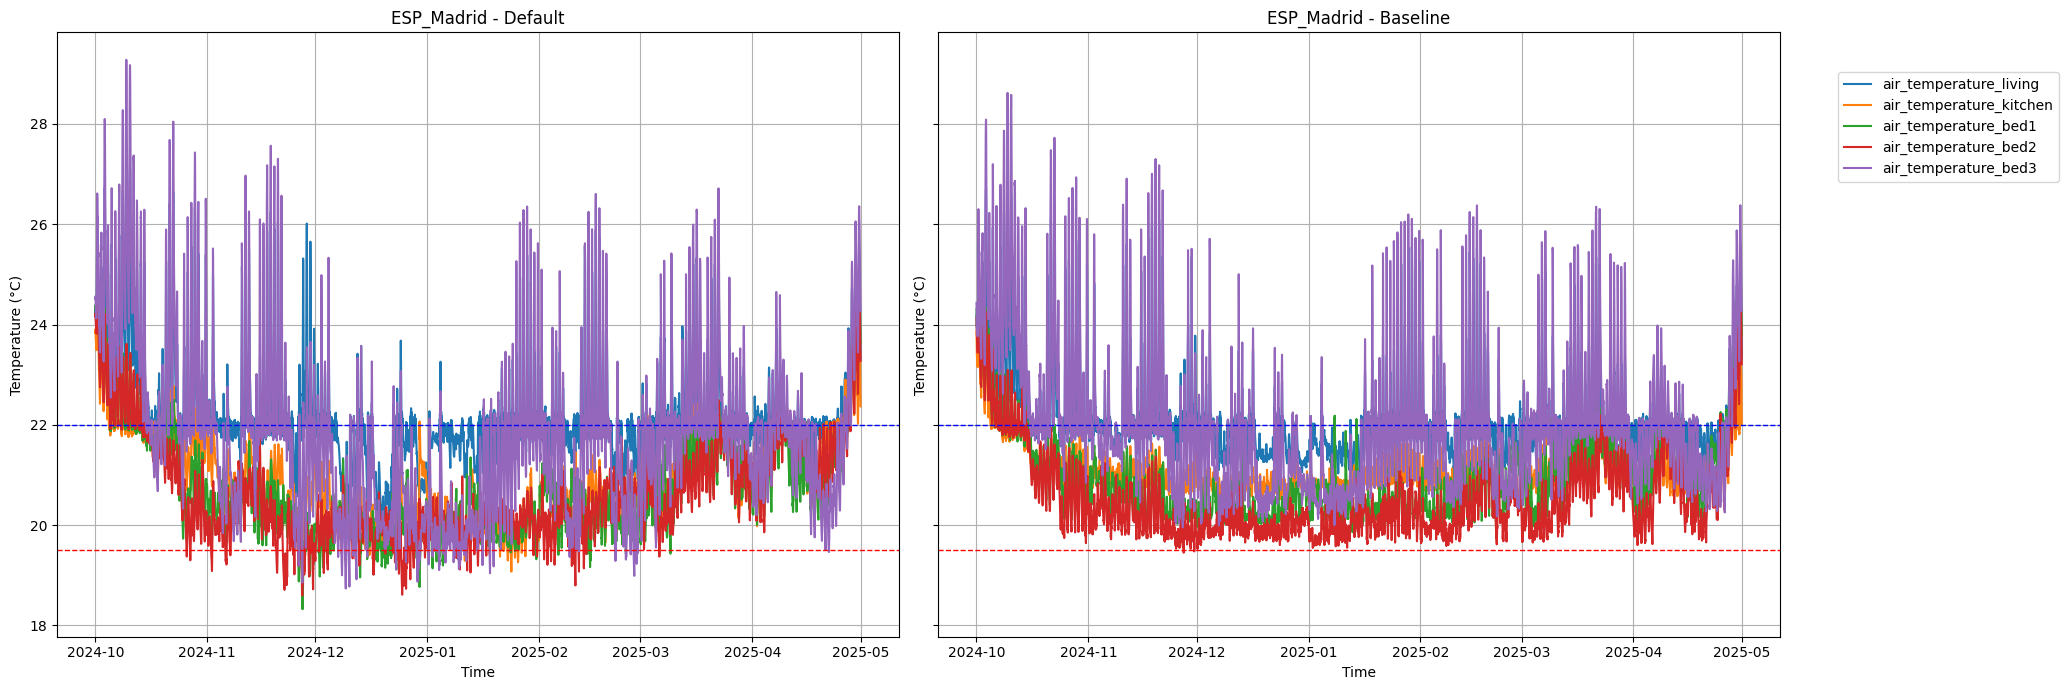

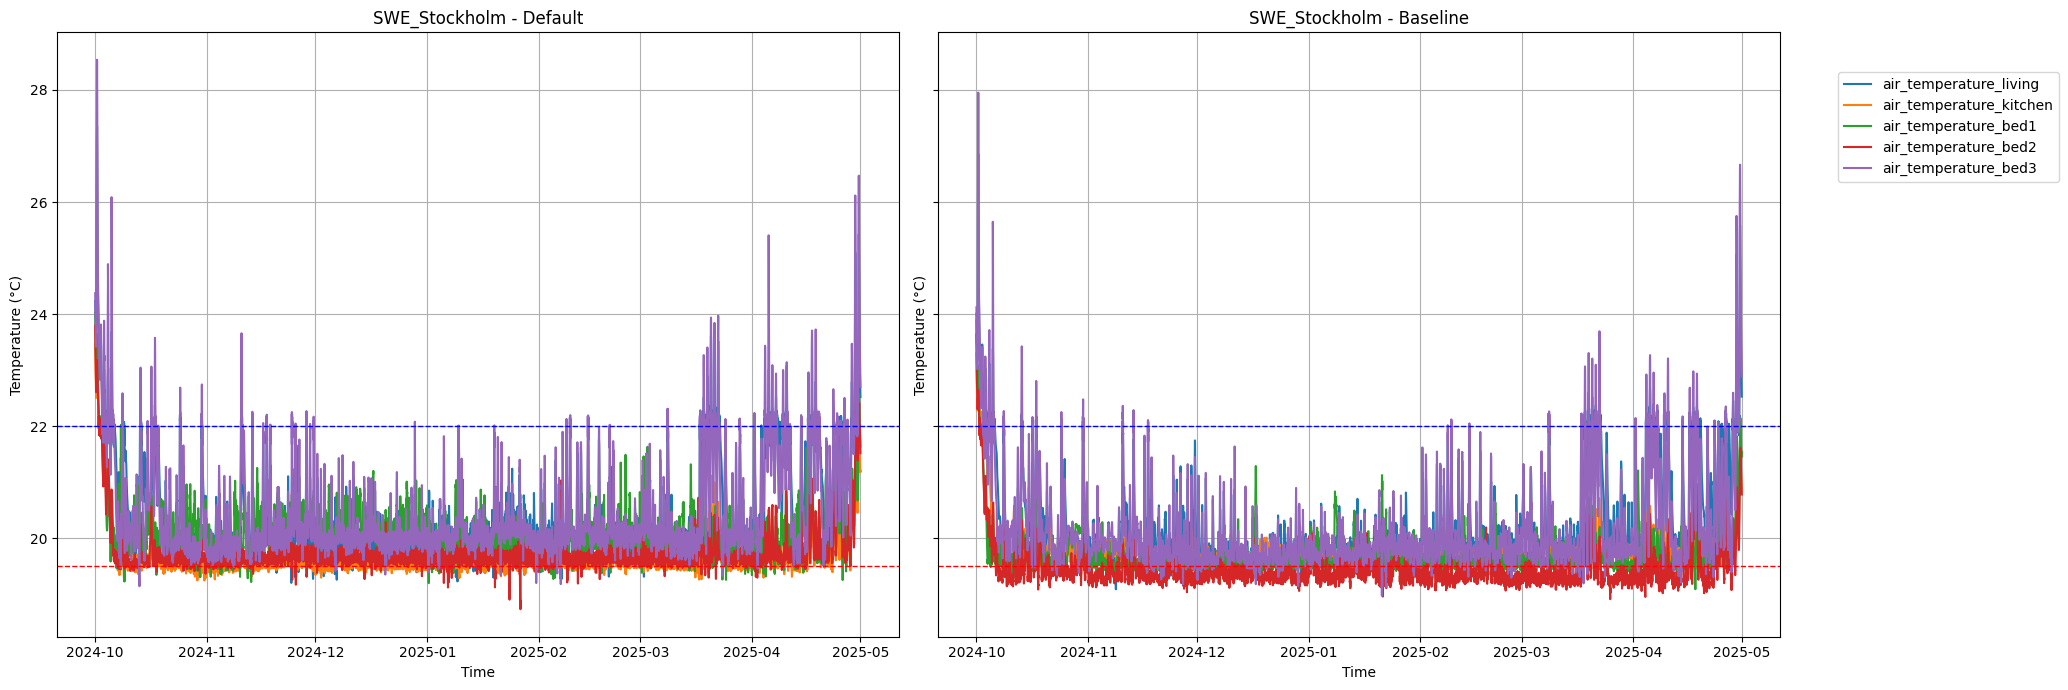

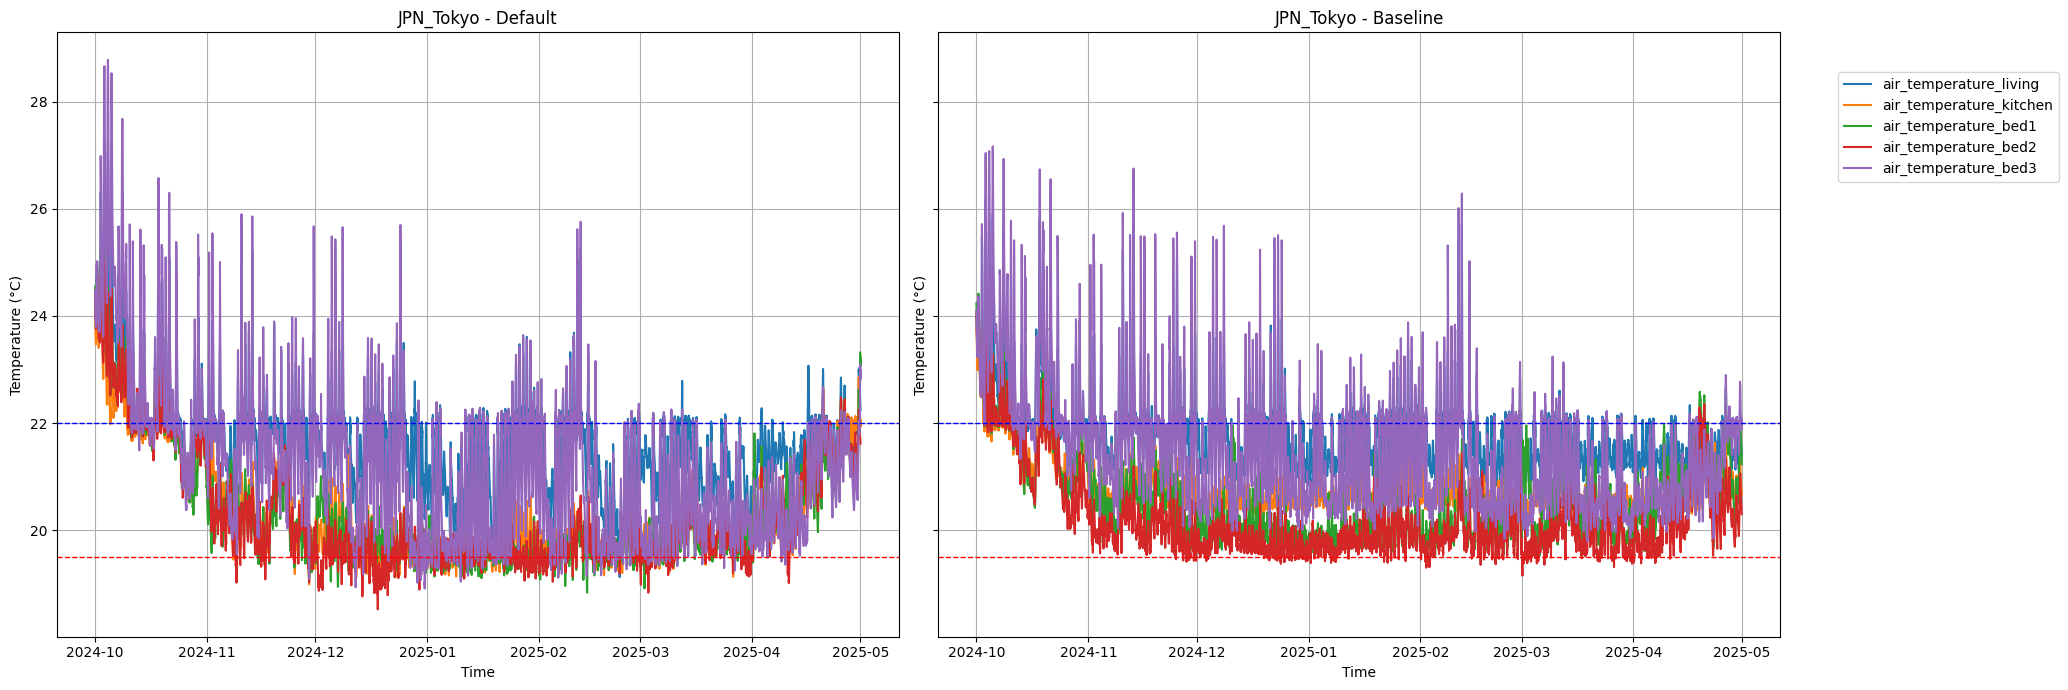

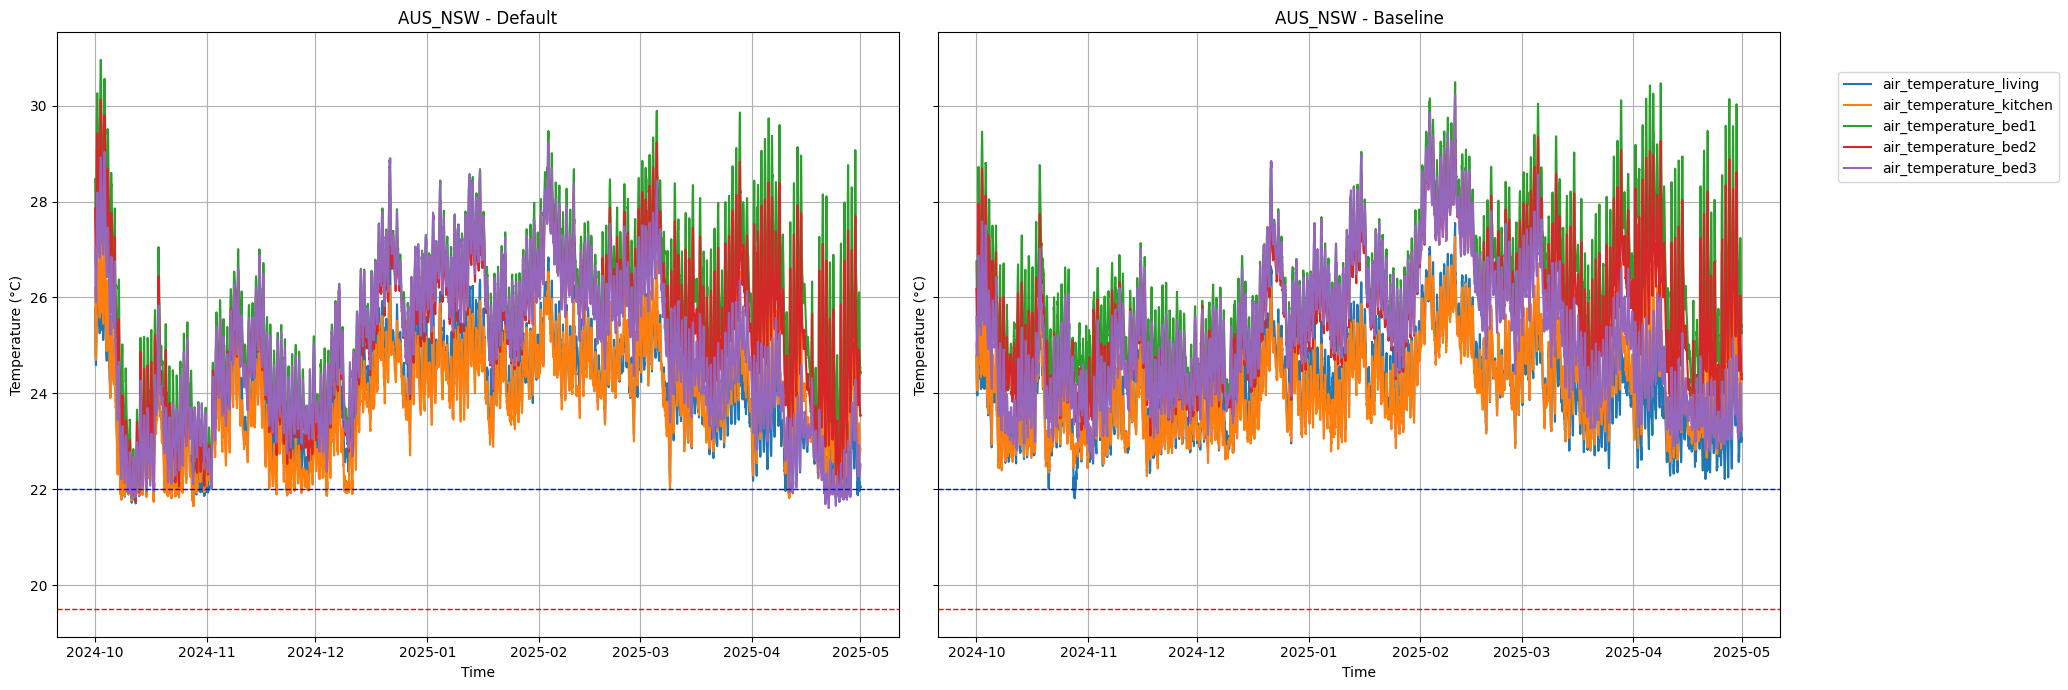

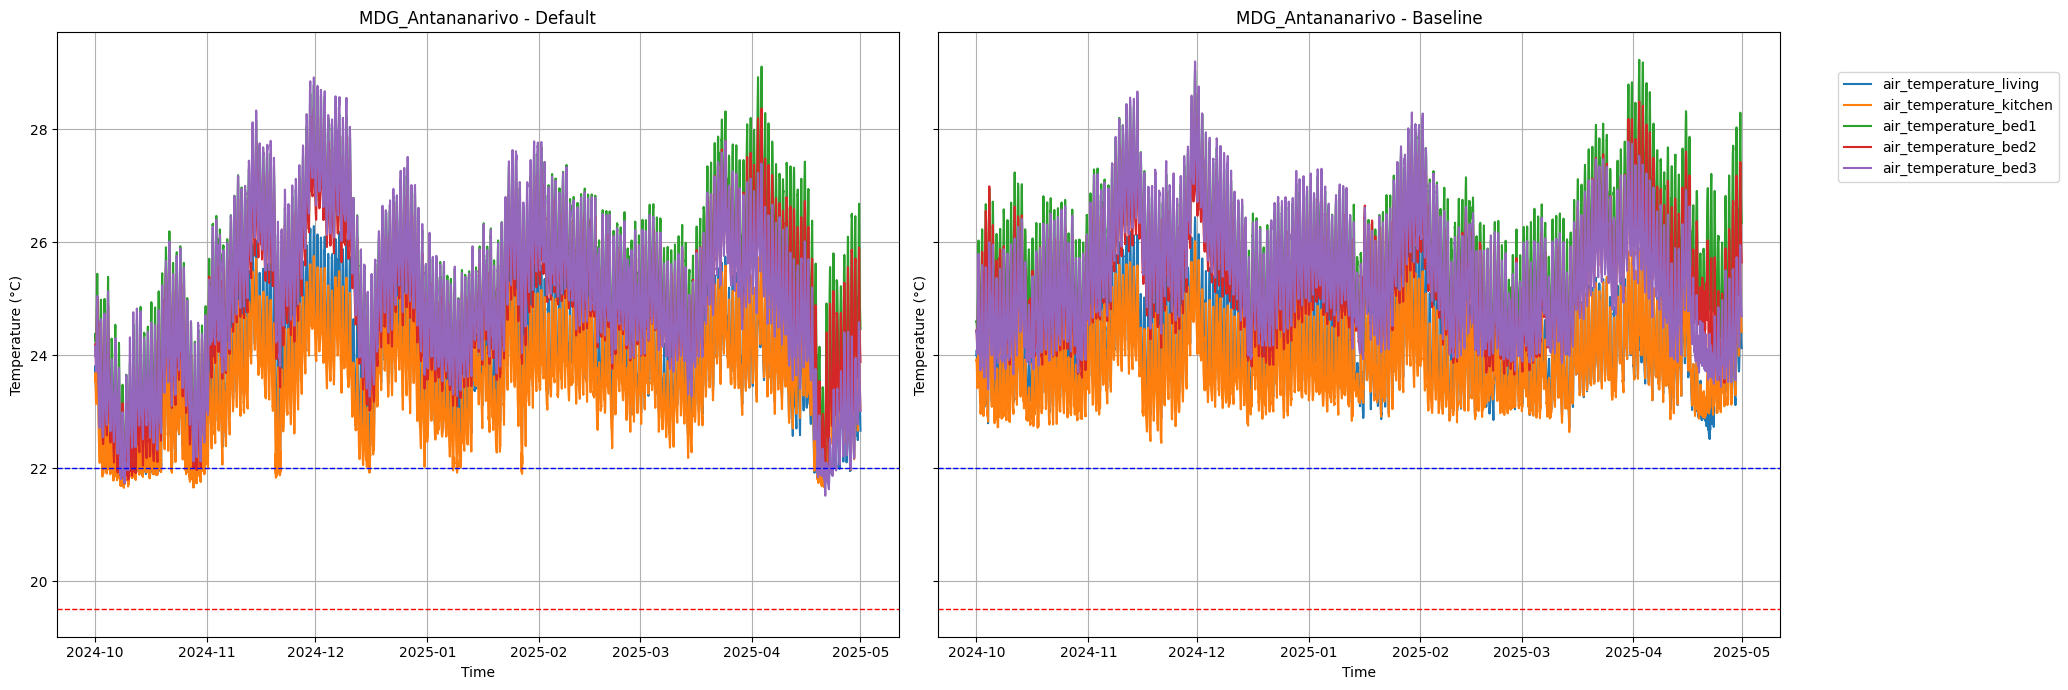

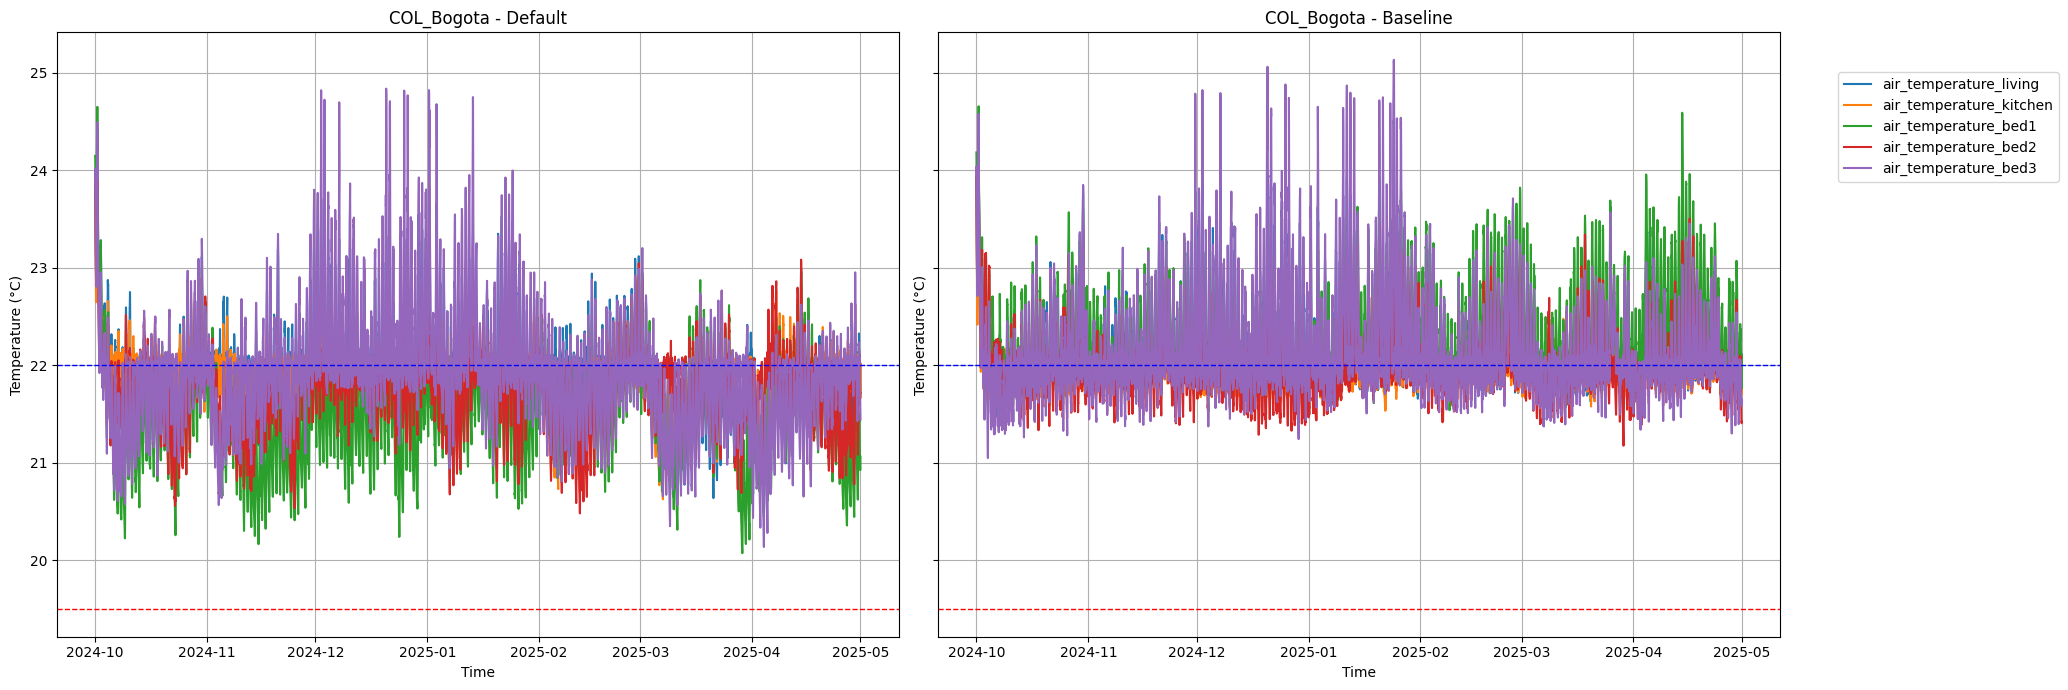

In [ ]:
compare_plots('.', 'episode-9/monitor/observations.csv', 'plots')